# 추가과제 (과제2 대체)

과제 2로 제출하고 싶어 노력했지만 실패했습니당,,
그래도 과제2에서 시도해 본 부분까지는 코드에 같이 첨부했습니다!

# Assignment2
## Anomaly detection 데이터셋을 SVM을 이용해서 판별해보자
### 데이터 분포 : True : 0.17프로 나머지 다 False, Row약 28만행 < 데이터 트레인 시간이 오래걸립니다.(그래도 자고 일어나면 트레이닝 돼있기는 하는정도입니다.!!)
### 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!
### 시간이 없거나 좀 어렵다 하시는 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [16]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().sum() #결측치 없음 !

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

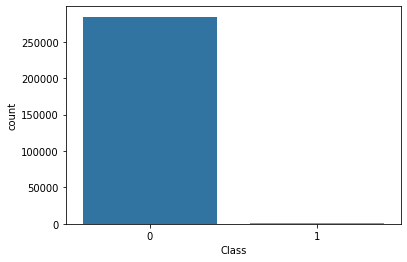

In [8]:
sns.countplot('Class', data=data)

imbalanced한 데이터 -> under scaling 하자!

In [17]:
new_data = data.sample(frac=1)

In [18]:
data['Class'].value_counts() # 사기의 경우는 492개 데이터 

0    284314
1       492
Name: Class, dtype: int64

In [19]:
# 492개로 맞춰주자
data_fraud = df.loc[new_data['Class'] == 1]
data_fraud_no = df.loc[new_data['Class'] == 0][:492]

In [20]:
normal_f = pd.concat([data_fraud, data_fraud_no])

In [22]:
new_data2 = normal_f.sample(frac=1, random_state=42) # 셔플링해주자!
new_data2.head() # 데이터 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78425,57518.0,-0.274582,-4.231381,0.570888,-0.227664,-2.965088,1.049006,-0.812944,0.226305,-0.730867,...,0.119040,-0.703529,-0.616457,0.261200,-0.082965,-0.297232,-0.047727,0.159613,835.00,0
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
47653,43297.0,1.197170,0.669627,-0.250917,1.255511,0.275149,-0.711525,0.265432,-0.144473,-0.188303,...,-0.016521,0.091466,-0.097859,-0.015868,0.641593,-0.300149,0.052827,0.049305,1.00,0
99506,67150.0,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,...,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,489.71,1
154234,100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,...,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00,1


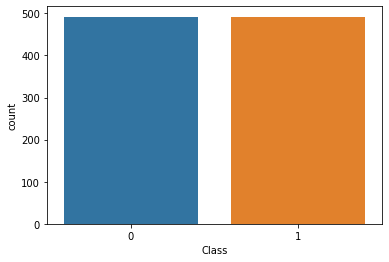

In [24]:
# 제대로 된건지 확인하고 넘어갑시당
sns.countplot('Class', data=new_data2)

같은 개수만큼 언더샘플링 되었음을 확인할 수 있다!

In [25]:
df = new_data2 # 단순한 이름으로 바꾸고 넘어가겠습니다~

In [26]:
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] #타겟변수

In [27]:
y #492*2개의 데이터

78425     0
141260    1
47653     0
99506     1
154234    1
         ..
192382    1
6334      1
85112     0
239499    1
79835     1
Name: Class, Length: 984, dtype: int64

In [32]:
#스케일링
scaler = StandardScaler() #정규화를 하자!
new_X = scaler.fit_transform(X) # 스케일링을 해주자!

In [34]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=48)

In [35]:
from sklearn import metrics #model evaluation하는 라이브러리
svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_train,y_train) # 모델 훈련 중...
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.9543147208121827


In [36]:
 # rbf 커널
svc_rbf=SVC(kernel='rbf', gamma = 1)
svc_rbf.fit(X_train,y_train) # 모델트레이닝
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7868020304568528


리니어 모델의 Accuracy Score 가 좀 더 높게 나오네요!

In [37]:
from tqdm import tqdm  # 몇 번째의 for문이 도는지 show
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation
for c in tqdm(C_range):
    svc = SVC(kernel='rbf', C=c, gamma = 'scale')
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:53<00:00,  1.47it/s]


0.5783673469387755
3


Text(0, 0.5, 'Cross-Validated Accuracy')

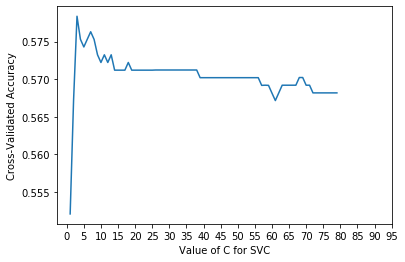

In [38]:
# 전반적으로 보면 -> 커질수록 떨어지는 경향 확인 가능!
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [39]:
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc.fit(X_train,y_train)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|████████████████████████████████████████████████████████████████████████████████| 290/290 [03:15<00:00,  1.48it/s]


0.5783673469387755
2.7000000000000015


Text(0, 0.5, 'Accuracy')

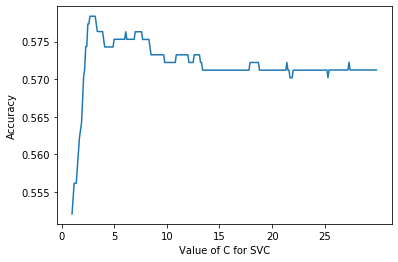

In [40]:
# 각 하이퍼 파라미터 별 값 확인
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,30,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')

In [41]:
C_range[np.argmax(acc_score)]
# 결과를 통해 C가 약 2.7일 때 최대값임을 확인할 수 있음

2.7000000000000015

In [42]:
tuned_parameters = {
 'C': (np.arange(3,5,0.2)), 'kernel': ['linear'],
 'C': (np.arange(3,5,0.2)), 'gamma': (np.arange(1,5.1)), 'kernel': ['rbf']
                   }

In [43]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)

In [44]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.835, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.734, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.848, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.747, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.696, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.785, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.797, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.810, total=   0.1s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.769, total=   0.1s
[CV] C

[CV] ........ C=3.2, gamma=1.0, kernel=rbf, score=0.818, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.684, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.696, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] ........ C=3.2, gamma=2.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=3.2, gamma=2.0, kernel=rbf ....................................
[CV] .

[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.671, total=   0.1s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.577, total=   0.1s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.675, total=   0.1s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3

[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=3.6000000000000005, gamma=3.0, kernel=rbf .....................
[CV]  C=3.6000000000000005, gamma=3.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=3.6000000000000005, g

[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.584, total=   0.1s
[CV] C=3.8000000000000007, gamma=4.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=4.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=3.8000000000000007, gamma=4.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=4

[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.620, total=   0.0s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.000000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.000000000000001, gamma=4.0, ker

[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.584, total=   0.1s
[CV] C=4.200000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=4.200000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=5.0, ker

[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.620, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.519, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.400000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.400000000000001, gamma=5.0, ker

[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.633, total=   0.1s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.584, total=   0.1s
[CV] C=4.800000000000002, gamma=1.0, kernel=rbf ......................
[CV]  C=4.800000000000002, gamma=1.0, kernel=rbf, score=0.835, total=   0.1s
[CV] C=4.800000000000002, gamma=1.0, kernel=rbf ......................
[CV]  C=4.800000000000002, gamma=1.0, ker

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   33.4s finished


0.783989834815756


In [45]:
# 최고의 결과가 나온 경우 print!
print(model_svm.best_params_)

{'C': 3.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [46]:
svm_temp = SVC(kernel = 'rbf', gamma = 1.0, C = 3.0)

In [47]:
svm_temp.fit(X_train,y_train)
y_pred = svm_temp.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.7918781725888325


Accuracy Score 가 0.79 임을 확인할 수 있음!